Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:

```
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
```

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:

```
print(load_boston()[‘DESCR’])
```

Если вы не удовлетворены результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
X = data[load_boston()['feature_names']]
y = data['MEDV']

Для начала мне нужна функция, чтобы измерять успешность модели. Метрикой будет MSE. Я буду смотреть ее значение на обучающей и тестовой выборке, а также на выборке целиком.

При обучении модели я больше всего опиралась на MSE тестовой выборки.

In [8]:
def training(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    model_2 = LinearRegression().fit(X, y)
    predicted_0 = model.predict(X_train)
    predicted = model.predict(X_test)
    predicted_2 = model.predict(X)
    print(f'learning error: {mean_squared_error(predicted_0, y_train)}')
    print(f'generalization Error: {mean_squared_error(predicted, y_test)}')
    print(f'Error: {mean_squared_error(predicted_2, y)}')
    
#Контрольные значения: линейная регрессия на исходных данных
training(X, y)

learning error: 22.545481487421426
generalization Error: 21.517444231177432
Error: 22.236663971711767


Сразу показываю результат, который получился. Дальше объясню ход своих мыслей подробнее, по пунктам

In [160]:
def best_dataset(data=pd.read_csv(load_boston()['filename'], skiprows=1)):
    columns = list(load_boston()['feature_names'])
    the_data = data[ (data['CRIM'] < 17) ]
    
    for col in ['RM', 'LSTAT', 'ZN', 'INDUS', 'PTRATIO', 'NOX', 'RAD', 'AGE', 'TAX']:
        the_data[col + '2'] = the_data[col] ** 2
        columns.append(col + '2')
    
    for col in ['RAD', 'INDUS', 'PTRATIO', 'NOX']:
        the_data [col + '3'] = the_data[col] ** 3
        columns.append(col + '3')
        
    for i in range(4, 7):
        the_data['PTRATIO' + str(i)] = the_data.PTRATIO ** i
        columns.append('PTRATIO' + str(i))
    
    the_data['NOX_INDUS'] = the_data['INDUS'] / (the_data['NOX'] ** 7)
    the_data['B_LSTAT'] = 1 / the_data['B'] / the_data['LSTAT']
    the_data['CRIM_RM'] = 1 / the_data['CRIM'] / the_data['RM']
    the_data['CRIM_AGE'] = the_data['AGE'] / the_data['CRIM']
    the_data['CRIM_PTRATIO'] = (the_data['PTRATIO'] ** 8) * the_data['CRIM']
    the_data['CHAS_INDUS'] = the_data['CHAS'] * (the_data['INDUS3'] ** 3)
    the_data['CHAS_NOX'] = the_data['CHAS'] * (the_data['NOX2'] ** 22)
    the_data['CHAS_AGE'] = the_data['CHAS'] * (the_data['AGE'] ** 5)
    the_data['CHAS_LSTAT'] = the_data['CHAS'] * the_data['LSTAT']
    the_data['LSTAT_AGE'] = the_data['LSTAT'] * (the_data['AGE'] ** 2)
    the_data['LSTAT_INDUS'] = the_data['LSTAT'] * (the_data['INDUS'] ** 3)
    the_data['LSTAT_NOX'] = 1 / the_data['LSTAT'] / the_data['NOX']
    the_data['LSTAT_RM'] = 1 / the_data['LSTAT'] / the_data['RM']
    the_data['LSTAT_DIS'] = (the_data['DIS'] ** 2) / the_data['LSTAT']
    the_data['LSTAT_RAD'] = the_data['RAD'] / the_data['LSTAT']
    the_data['LSTAT_PTRATIO'] = the_data['PTRATIO6'] * the_data['LSTAT']
    the_data['RM_ZN'] = the_data['ZN'] / the_data['RM']
    the_data['RM_INDUS'] = (the_data['INDUS'] ** 2) / the_data['RM']
    the_data['INDUS_TAX'] = the_data['INDUS'] / the_data['TAX']
    the_data['INDUS_PTRATIO'] = the_data['INDUS'] / the_data['PTRATIO']
    the_data['ZN_TAX'] = the_data['ZN'] * the_data['TAX']
    the_data['ZN_PTRATIO'] = the_data['ZN'] / (the_data['PTRATIO'] ** 2)
    the_data['ZN_B'] = (the_data['ZN'] ** 2) / (the_data['B'] ** 2)
    the_data['AGE_DIS'] = the_data['DIS'] * (the_data['AGE'] ** 5)
    the_data['AGE_RAD'] = the_data['AGE'] * (the_data['RAD'] ** 3)
    the_data['DIS_B'] = (the_data['DIS'] ** 3) / the_data['B']
    the_data['RAD_TAX'] = the_data['TAX'] * (the_data['RAD'] ** 2)
    the_data['RAD_B'] = (the_data['B'] ** 4) / the_data['RAD']
    the_data['CRIM_B_LSTAT'] = 1 / the_data['CRIM'] / the_data['B'] / (the_data['LSTAT'] ** 2)
    
    columns.extend(['NOX_INDUS', 'B_LSTAT', 'CRIM_RM', 'CRIM_AGE', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX','CHAS_AGE', 
                    'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 
                    'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'INDUS_TAX', 'INDUS_PTRATIO', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 
                    'AGE_DIS', 'AGE_RAD', 'DIS_B', 'RAD_TAX', 'RAD_B', 'CRIM_B_LSTAT'])
    
    return the_data, columns

В финальную версию вошли не все переменные, которые я нашла. В результате повторной проверки оказалось, что некоторые из них плохо влияют на результат, пришлось их изменять и удалять.

In [161]:
the_data, the_columns = best_dataset()
len(the_columns)

58

In [162]:
X = the_data[the_columns]
y = the_data['MEDV']

# В результате удалось снизить MSE в два раза, на тестовой выборке - в 4 раза.
training(X, y)

learning error: 11.98358013474167
generalization Error: 5.210511788832019
Error: 9.950257339385768


Теперь собственно как я пришла к такому составу переменных.

Во-первых, анализ датасета показал выбросы в трех столбцах. Оказалось, что выбросы в столбце 'CRIM' сильно влияют на итоговый результат. Я нашла пороговое значение CRIM, при котором ошибка на тестовой выборке была минимальной.

<AxesSubplot:xlabel='CRIM'>

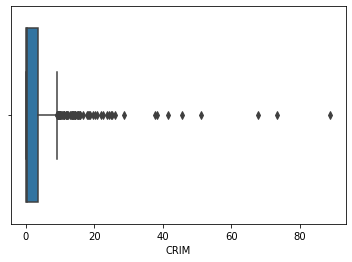

In [19]:
sns.boxplot(data['CRIM'])

In [20]:
for i in range(14, 20):
    dwo_crim = data[ (data['CRIM'] < i) ]
    print(i)
    print(len(data) - len(dwo_crim))
    X = dwo_crim.iloc[:, :13]
    y = dwo_crim['MEDV']
    training(X, y)

14
36
learning error: 20.97843693844168
generalization Error: 20.671036342003756
Error: 20.886216759510297
15
30
learning error: 23.48944866330632
generalization Error: 15.393684109881782
Error: 21.05731771553382
16
24
learning error: 24.09962265412695
generalization Error: 13.498111899842202
Error: 20.910371493605602
17
23
learning error: 24.154321815291524
generalization Error: 13.185242209850474
Error: 20.861326902684993
18
22
learning error: 24.013458922874587
generalization Error: 13.952539423214924
Error: 20.97855345396899
19
19
learning error: 23.366329207362938
generalization Error: 18.410113508523025
Error: 21.870305166850684


Выбросы в следующих двух столбцах убрать не удалось, потому что это повышало ошибку.

<AxesSubplot:xlabel='DIS'>

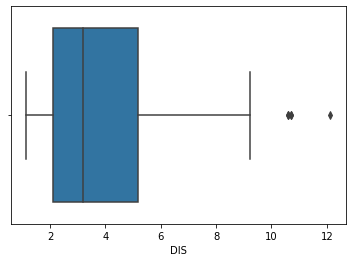

In [21]:
sns.boxplot(data['DIS'])

In [22]:
data[ (data['DIS'] > 10) ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [23]:
dwo_dis = data[ (data['DIS'] < 10) ]
X = dwo_dis.iloc[:, :13]
y = dwo_dis['MEDV']
training(X, y)

learning error: 24.64273286171477
generalization Error: 16.310409572126968
Error: 22.13139390617035


In [24]:
dwo = data[ (data['CRIM'] < 17) & (data['DIS'] < 10) ]
X = dwo.iloc[:, :13]
y = dwo['MEDV']
training(X, y)

learning error: 24.16880868632936
generalization Error: 14.347522254179081
Error: 21.21009478208325


In [25]:
dwo = data[ (data['CRIM'] < 17) & (data['DIS'] < 11) ]
X = dwo.iloc[:, :13]
y = dwo['MEDV']
training(X, y)

learning error: 23.84879981577721
generalization Error: 14.100554679302888
Error: 20.916236444846138


<AxesSubplot:xlabel='B'>

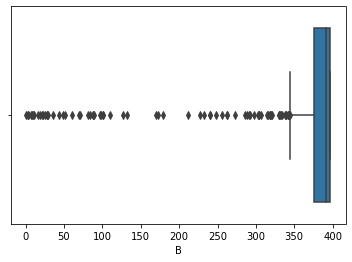

In [26]:
sns.boxplot(data['B'])

В этом столбце выбросов слишком много. Поэтому я не буду выводить их текстом, а построю графики зависимости ошибки на тестовой выборке от порогового значения.

In [31]:
def test_error(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    predicted = model.predict(X_test)
    return mean_squared_error(predicted, y_test)

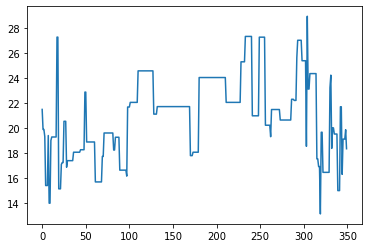

In [32]:
x_plot = []
y_plot = []
for i in range(0, 350):
    dwo_b = data[ (data['B'] > i) ]
    X = dwo_b.iloc[:, :13]
    y = dwo_b['MEDV']
    x_plot.append(i)
    y_plot.append(test_error(X, y))

plt.plot(x_plot, y_plot)

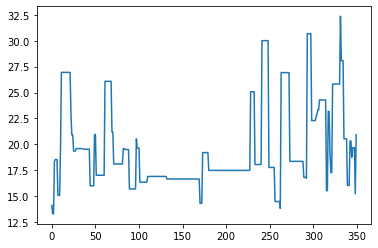

In [34]:
x_plot = []
y_plot = []
for i in range(0, 350):
    dwo_b = dwo[ (dwo['B'] > i) ]
    X = dwo_b.iloc[:, :13]
    y = dwo_b['MEDV']
    x_plot.append(i)
    y_plot.append(test_error(X, y))

plt.plot(x_plot, y_plot)

Была попытка рассмотреть некоторые переменные как категориальные, но ничего не получилось.

In [35]:
data['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [36]:
data['RAD-index'] = data['RAD'].apply(lambda x: 1 if x > 20 else 0)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD-index
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [37]:
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14]]
y = data['MEDV']

training(X, y)

learning error: 22.72676266355887
generalization Error: 21.949149337216316
Error: 22.493171308610126


In [38]:
dwo_crim['RAD-index'] = dwo_crim['RAD'].apply(lambda x: 1 if x > 20 else 0)
X = dwo_crim.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14]]
y = dwo_crim['MEDV']

training(X, y)

learning error: 23.54253695788312
generalization Error: 18.766134158029182
Error: 22.100789090165403


In [39]:
data['RAD_index'] = LabelEncoder().fit_transform(data['RAD'])
del data['RAD-index']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_index
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [40]:
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14]]
y = data['MEDV']

training(X, y)

learning error: 22.751549505164174
generalization Error: 22.182215595665006
Error: 22.58052429914861


In [41]:
dwo_crim['RAD_index'] = LabelEncoder().fit_transform(dwo_crim['RAD'])
X = dwo_crim.loc[:, ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RAD_index']]
y = dwo_crim['MEDV']

training(X, y)

learning error: 23.454992702321913
generalization Error: 18.80691389585348
Error: 22.051979181683592


In [42]:
data['TAX'].value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
313      1
226      1
280      1
241      1
469      1
Name: TAX, Length: 66, dtype: int64

In [43]:
data['TAX_index'] = LabelEncoder().fit_transform(data['TAX'])
del data['RAD_index']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_index
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,34
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,11
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,11
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,23
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,23
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,23
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,23


In [44]:
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14]]
y = data['MEDV']

training(X, y)

learning error: 22.706305586507614
generalization Error: 22.218621177490004
Error: 22.559807503166358


In [45]:
dwo_crim['TAX_index'] = LabelEncoder().fit_transform(dwo_crim['TAX'])
del dwo_crim['RAD_index']
dwo_crim

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD-index,TAX_index
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,34
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,11
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,11
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,23
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,23
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,23
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,23


In [46]:
X = dwo_crim.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14]]
y = dwo_crim['MEDV']

training(X, y)

learning error: 23.54253695788312
generalization Error: 18.766134158029182
Error: 22.100789090165403


In [47]:
del data['TAX_index']
del dwo_crim['TAX_index']

In [49]:
del dwo_crim['RAD-index']
dwo_crim

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [48]:
columns = load_boston()['feature_names']

Дальше я решила посмотреть, насколько улучшит результат возведение переменных в степень. Алгоритм следующий:
1. Прохожусь циклом по исходным признакам. Добавляю колонку с одним из признаков, возведенным в степень. Считаю ошибку. Удаляю колонку.
2. Выбираю признак, возведение которого в степень лучше всего повлияло на MSE. Добавляю его в нужной степени к датасету.
3. Повторяю с другими признаками до тех пор, пока эта операция уменьшает ошибку.

In [50]:
columns = list(load_boston()['feature_names'])

for col in columns:
    dwo_crim['col**2'] = dwo_crim[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_crim.loc[:, columns + ['col**2']]
    y = dwo_crim['MEDV']
    training(X, y)
    del dwo_crim['col**2']

CRIM
learning error: 23.346640707738455
generalization Error: 18.65410893441557
Error: 21.930209145770355
ZN
learning error: 23.19825811075056
generalization Error: 18.143153138124905
Error: 21.672384535851236
INDUS
learning error: 22.966054598904574
generalization Error: 17.800247104500105
Error: 21.40676568375579
CHAS
learning error: 23.36632920736294
generalization Error: 18.41011350852306
Error: 21.870305166850695
NOX
learning error: 23.34763672703481
generalization Error: 18.344153013616758
Error: 21.837344928528744
RM
learning error: 18.835392842533864
generalization Error: 11.934572266939439
Error: 16.752393613350332
AGE
learning error: 23.079616272710883
generalization Error: 18.32422525750453
Error: 21.644210771200957
DIS
learning error: 21.93721856746006
generalization Error: 17.764997205649895
Error: 20.677841688227836
RAD
learning error: 23.331705986847123
generalization Error: 18.39818553904923
Error: 21.842532463589855
TAX
learning error: 23.23843597866599
generalization 

In [51]:
columns = list(load_boston()['feature_names'])
columns.append('RM2')

dwo_rm = dwo_crim
dwo_rm['RM2'] = dwo_crim['RM'].apply(lambda x: x ** 2)
X = dwo_rm.loc[:, columns]
y = dwo_rm['MEDV']
training(X, y)

learning error: 18.835392842533864
generalization Error: 11.934572266939439
Error: 16.752393613350332


In [52]:
for col in columns:
    dwo_rm['col**2'] = dwo_rm[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_rm.loc[:, columns + ['col**2']]
    y = dwo_rm['MEDV']
    training(X, y)
    del dwo_rm['col**2']

CRIM
learning error: 18.617077967935504
generalization Error: 12.834542603184095
Error: 16.87163094818508
ZN
learning error: 18.761893974804394
generalization Error: 11.763114743395718
Error: 16.64932611645311
INDUS
learning error: 18.677310634257754
generalization Error: 11.530625218952833
Error: 16.520097582820743
CHAS
learning error: 18.83539284253386
generalization Error: 11.934572266939682
Error: 16.752393613350403
NOX
learning error: 18.809413205845495
generalization Error: 11.87979301039986
Error: 16.71772086758983
RM
learning error: 18.835392842533864
generalization Error: 11.934572266939572
Error: 16.75239361335037
AGE
learning error: 18.58924848468655
generalization Error: 12.009296975579188
Error: 16.603102957296855
DIS
learning error: 18.060834045870223
generalization Error: 11.769127362188364
Error: 16.161694656750644
RAD
learning error: 18.83109541203997
generalization Error: 11.941794716182525
Error: 16.751573436083003
TAX
learning error: 18.781999439054363
generalizatio

In [53]:
dwo_rm['LSTAT2'] = dwo_rm['LSTAT'].apply(lambda x: x ** 2)
dwo_squared = dwo_rm
columns.append('LSTAT2')
dwo_squared

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM2,LSTAT2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,43.230625,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,41.229241,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,51.624225,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,48.972004,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,51.079609,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,43.467649,93.5089
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,37.454400,82.4464
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,48.664576,31.8096
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,46.158436,41.9904


In [54]:
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 17.498095179547235
generalization Error: 10.574825556133101
Error: 15.408319749071099


In [55]:
for col in columns[:-2]:
    dwo_squared['col**2'] = dwo_squared[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**2']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**2']

CRIM
learning error: 17.225834507102313
generalization Error: 11.381851757294875
Error: 15.461839714039284
ZN
learning error: 17.43912844192818
generalization Error: 10.35932140955136
Error: 15.302102499917105
INDUS
learning error: 17.376618485615083
generalization Error: 10.405231277729039
Error: 15.272318856129973
CHAS
learning error: 17.498095179547242
generalization Error: 10.57482555613306
Error: 15.408319749071094
NOX
learning error: 17.428934983779143
generalization Error: 10.498893885783582
Error: 15.337115596909848
RM
learning error: 17.498095179547224
generalization Error: 10.574825556133106
Error: 15.408319749071094
AGE
learning error: 17.40213864733695
generalization Error: 10.687373804765128
Error: 15.375299978223895
DIS
learning error: 16.871192022346463
generalization Error: 10.673165756591848
Error: 15.000329884634082
RAD
learning error: 17.498062528370156
generalization Error: 10.574448606907957
Error: 15.408183172199845
TAX
learning error: 17.44295501225646
generaliza

In [56]:
dwo_squared['ZN2'] = dwo_squared['ZN'].apply(lambda x: x ** 2)
columns.append('ZN2')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 17.43912844192818
generalization Error: 10.35932140955136
Error: 15.302102499917105


In [57]:
for col in columns[:-3]:
    dwo_squared['col**2'] = dwo_squared[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**2']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**2']

CRIM
learning error: 17.196248924801598
generalization Error: 11.178152714274622
Error: 15.37969832326676
ZN
learning error: 17.439128441928197
generalization Error: 10.359321409551399
Error: 15.302102499917131
INDUS
learning error: 17.308647833402137
generalization Error: 10.175377082467353
Error: 15.155483972237018
CHAS
learning error: 17.439128441928165
generalization Error: 10.359321409551399
Error: 15.302102499917108
NOX
learning error: 17.368684804504653
generalization Error: 10.281390814708121
Error: 15.229398939001388
RM
learning error: 17.439128441928187
generalization Error: 10.359321409551344
Error: 15.302102499917108
AGE
learning error: 17.341112601168128
generalization Error: 10.478351834378474
Error: 15.269601651028335
DIS
learning error: 16.828622931633582
generalization Error: 10.455292032729943
Error: 14.904845432375193
RAD
learning error: 17.435398529475883
generalization Error: 10.348184503367316
Error: 15.296136800855841
TAX
learning error: 17.39081245079928
general

In [58]:
dwo_squared['INDUS2'] = dwo_squared['INDUS'].apply(lambda x: x ** 2)
columns.append('INDUS2')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 17.308647833402137
generalization Error: 10.175377082467353
Error: 15.155483972237018


In [59]:
for col in columns[:-4]:
    dwo_squared['col**2'] = dwo_squared[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**2']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**2']

CRIM
learning error: 17.04560037478229
generalization Error: 10.992747895612215
Error: 15.218558661357239
ZN
learning error: 17.308647833402137
generalization Error: 10.17537708246772
Error: 15.155483972237128
INDUS
learning error: 17.308647833402127
generalization Error: 10.175377082467111
Error: 15.155483972236937
CHAS
learning error: 17.308647833402112
generalization Error: 10.175377082467712
Error: 15.15548397223711
NOX
learning error: 17.243083941106846
generalization Error: 10.113755882297497
Error: 15.091110173868707
RM
learning error: 17.30864783340214
generalization Error: 10.175377082467582
Error: 15.155483972237088
AGE
learning error: 17.179220585964874
generalization Error: 10.318505539313291
Error: 15.108327132458136
DIS
learning error: 16.78693394055674
generalization Error: 10.354013174925537
Error: 14.845169356269702
RAD
learning error: 17.283364100411674
generalization Error: 10.138418755553205
Error: 15.126676285844539
TAX
learning error: 17.308568326298627
generaliza

In [60]:
dwo_squared['PTRATIO2'] = dwo_squared['PTRATIO'].apply(lambda x: x ** 2)
columns.append('PTRATIO2')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 17.049889499229394
generalization Error: 10.019808942719767
Error: 14.927873396956468


In [61]:
for col in columns[:-6]:
    dwo_squared['col**2'] = dwo_squared[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**2']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**2']

CRIM
learning error: 16.823474304652148
generalization Error: 10.821520261884611
Error: 15.011796184966668
ZN
learning error: 17.049889499229423
generalization Error: 10.019808942719663
Error: 14.927873396956455
INDUS
learning error: 17.049889499229423
generalization Error: 10.01980894271949
Error: 14.927873396956404
CHAS
learning error: 17.049889499229405
generalization Error: 10.019808942720937
Error: 14.927873396956832
NOX
learning error: 17.045884771988327
generalization Error: 10.002316342723116
Error: 14.919797381635174
RM
learning error: 17.04988949922938
generalization Error: 10.019808942719965
Error: 14.927873396956516
AGE
learning error: 16.95134262375914
generalization Error: 10.14039903557662
Error: 14.89547258790117
DIS
learning error: 16.564231359565184
generalization Error: 10.098420546500778
Error: 14.612538978619666
RAD
learning error: 17.013068563643124
generalization Error: 9.958215440054502
Error: 14.883574910321709
TAX
learning error: 17.04944452594672
generalizati

In [62]:
dwo_squared['RAD2'] = dwo_squared['RAD'].apply(lambda x: x ** 2)
columns.append('RAD2')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 17.013068563643124
generalization Error: 9.958215440054502
Error: 14.883574910321709


In [63]:
for col in columns[:-7]:
    dwo_squared['col**2'] = dwo_squared[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**2']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**2']

CRIM
learning error: 16.709301899901412
generalization Error: 10.84294136536789
Error: 14.93855241617158
ZN
learning error: 17.013068563643138
generalization Error: 9.958215440053955
Error: 14.883574910321556
INDUS
learning error: 17.013068563643145
generalization Error: 9.958215440056284
Error: 14.883574910322267
CHAS
learning error: 17.013068563643124
generalization Error: 9.95821544005484
Error: 14.883574910321812
NOX
learning error: 17.011369614190475
generalization Error: 9.946356756664166
Error: 14.878809264998756
RM
learning error: 17.013068563643134
generalization Error: 9.958215440055096
Error: 14.8835749103219
AGE
learning error: 16.925856474477982
generalization Error: 10.069095224764231
Error: 14.856156466864181
DIS
learning error: 16.556943142055314
generalization Error: 10.059697878233447
Error: 14.595762333468425
RAD
learning error: 17.013068563643134
generalization Error: 9.958215440055964
Error: 14.883574910322164
TAX
learning error: 16.99495300984891
generalization Er

In [64]:
dwo_squared['NOX2'] = dwo_squared['NOX'].apply(lambda x: x ** 2)
columns.append('NOX2')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 17.011369614190475
generalization Error: 9.946356756664166
Error: 14.878809264998756


In [65]:
for col in columns[:-8]:
    dwo_squared['col**2'] = dwo_squared[col].apply(lambda x: x ** 2)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**2']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**2']

CRIM
learning error: 16.69481805135004
generalization Error: 10.850443551592313
Error: 14.930705009328715
ZN
learning error: 17.011369614190453
generalization Error: 9.946356756664525
Error: 14.878809264998848
INDUS
learning error: 17.011369614190457
generalization Error: 9.946356756664432
Error: 14.878809264998823
CHAS
learning error: 17.01136961419046
generalization Error: 9.946356756665812
Error: 14.87880926499924
NOX
learning error: 17.011369614190453
generalization Error: 9.946356756665118
Error: 14.87880926499903
RM
learning error: 17.011369614190478
generalization Error: 9.946356756664404
Error: 14.87880926499883
AGE
learning error: 16.92163767131453
generalization Error: 10.050926461822481
Error: 14.847726895554098
DIS
learning error: 16.555254441619553
generalization Error: 10.077372057845327
Error: 14.599918280603516
RAD
learning error: 17.01136961419049
generalization Error: 9.946356756665248
Error: 14.878809264999088
TAX
learning error: 16.994164858189535
generalization Err

In [66]:
for col in columns[:-7]:
    dwo_squared['col**3'] = dwo_squared[col].apply(lambda x: x ** 3)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**3']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**3']

CRIM
learning error: 16.747069223678444
generalization Error: 10.885922437082893
Error: 14.97789349959313
ZN
learning error: 16.810213697169676
generalization Error: 10.211062714229225
Error: 14.818272846056233
INDUS
learning error: 16.938681599234403
generalization Error: 9.630966152754963
Error: 14.732861947011655
CHAS
learning error: 17.01136961419046
generalization Error: 9.946356756665812
Error: 14.87880926499924
NOX
learning error: 16.963088393971805
generalization Error: 9.754287589559938
Error: 14.787125933502516
RM
learning error: 16.793474968952584
generalization Error: 11.131155511687862
Error: 15.084314886369597
AGE
learning error: 16.868890799986062
generalization Error: 10.112788443641438
Error: 14.829574482978545
DIS
learning error: 16.698733237659493
generalization Error: 10.050563551514825
Error: 14.691996186605554
RAD
learning error: 16.90004690799414
generalization Error: 9.890152546123828
Error: 14.784123969195507
TAX
learning error: 17.008015268750484
generalizatio

In [67]:
dwo_squared['RAD3'] = dwo_squared['RAD'].apply(lambda x: x ** 3)
columns.append('RAD3')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 16.90004690799414
generalization Error: 9.890152546123828
Error: 14.784123969195507


In [68]:
for col in columns[:-8]:
    dwo_squared['col**3'] = dwo_squared[col].apply(lambda x: x ** 3)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**3']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**3']

CRIM
learning error: 16.65033273787352
generalization Error: 10.81181415598045
Error: 14.88798729323639
ZN
learning error: 16.713042232171034
generalization Error: 10.152727202836067
Error: 14.732823937895388
INDUS
learning error: 16.834490650246995
generalization Error: 9.597547529592935
Error: 14.650033486517742
CHAS
learning error: 16.900046907994103
generalization Error: 9.89015254612326
Error: 14.784123969195306
NOX
learning error: 16.849616816167202
generalization Error: 9.681015903604392
Error: 14.685788614633866
RM
learning error: 16.68555697252238
generalization Error: 11.045151828905697
Error: 14.983011682765394
AGE
learning error: 16.764286327297807
generalization Error: 10.053552748512212
Error: 14.738664487294761
DIS
learning error: 16.597561345819752
generalization Error: 9.909987711971471
Error: 14.578930290017498
RAD
learning error: 16.900046907994124
generalization Error: 9.890152546123895
Error: 14.784123969195512
TAX
learning error: 16.89980648868148
generalization E

In [69]:
dwo_squared['INDUS3'] = dwo_squared['INDUS'].apply(lambda x: x ** 3)
columns.append('INDUS3')
X = dwo_squared.loc[:, columns]
y = dwo_squared['MEDV']
training(X, y)

learning error: 16.834490650246995
generalization Error: 9.597547529592935
Error: 14.650033486517742


In [70]:
for col in columns[:-9]:
    dwo_squared['col**3'] = dwo_squared[col].apply(lambda x: x ** 3)
    print(col)
    X = dwo_squared.loc[:, columns + ['col**3']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**3']

CRIM
learning error: 16.607954591054884
generalization Error: 10.515248698918501
Error: 14.768883202668745
ZN
learning error: 16.605422175430494
generalization Error: 9.87558878210971
Error: 14.574035093668368
INDUS
learning error: 16.834490650246995
generalization Error: 9.597547529591322
Error: 14.650033486517252
CHAS
learning error: 16.834490650247
generalization Error: 9.597547529593045
Error: 14.65003348651778
NOX
learning error: 16.785535855750446
generalization Error: 9.398260571046775
Error: 14.55570122155858
RM
learning error: 16.630056654101537
generalization Error: 10.75622800755814
Error: 14.857052935329712
AGE
learning error: 16.705413011859054
generalization Error: 9.736716283824318
Error: 14.60192549846869
DIS
learning error: 16.58465693196525
generalization Error: 9.765356033659447
Error: 14.52626425834933
RAD
learning error: 16.83449065024701
generalization Error: 9.59754752959097
Error: 14.650033486517158
TAX
learning error: 16.789942820354593
generalization Error: 9.

In [71]:
dwo_squared['PTRATIO3'] = dwo_squared['PTRATIO'].apply(lambda x: x ** 3)
columns.append('PTRATIO3')
dwo_poli = dwo_squared.copy()
X = dwo_poli[columns]
y = dwo_poli['MEDV']
training(X, y)

learning error: 16.830107397611364
generalization Error: 9.578034149764868
Error: 14.641083234503697


In [74]:
for col in columns[:-10]:
    dwo_squared['col**3'] = dwo_squared[col].apply(lambda x: x ** 3)
    print(col)
    X = dwo_squared[columns + ['col**3']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**3']

CRIM
learning error: 16.60190632740117
generalization Error: 10.487274871007177
Error: 14.756216750214485
ZN
learning error: 16.6029707521179
generalization Error: 9.8632793238105
Error: 14.568608041725318
INDUS
learning error: 16.830107397611357
generalization Error: 9.578034149763894
Error: 14.641083234503396
CHAS
learning error: 16.83010739761137
generalization Error: 9.578034149764205
Error: 14.6410832345035
NOX
learning error: 16.77724829751895
generalization Error: 9.354252561737104
Error: 14.536631514849685
RM
learning error: 16.62741548825151
generalization Error: 10.733744660959823
Error: 14.848422445927325
AGE
learning error: 16.69504517596062
generalization Error: 9.710258879256621
Error: 14.586701057653665
DIS
learning error: 16.583874572956606
generalization Error: 9.760514283432594
Error: 14.524256580020198
RAD
learning error: 16.830107397611354
generalization Error: 9.57803414976058
Error: 14.641083234502394
TAX
learning error: 16.787316494234442
generalization Error: 9.

In [75]:
for col in columns[:-10]:
    dwo_squared['col**4'] = dwo_squared[col].apply(lambda x: x ** 4)
    print(col)
    X = dwo_squared[columns + ['col**4']]
    y = dwo_squared['MEDV']
    training(X, y)
    del dwo_squared['col**4']

CRIM
learning error: 16.633495964817627
generalization Error: 10.443359083937526
Error: 14.765015222539649
ZN
learning error: 16.613249003473417
generalization Error: 9.897535397403793
Error: 14.58612395194932
INDUS
learning error: 16.762857518189044
generalization Error: 9.722956273851755
Error: 14.637877060452736
CHAS
learning error: 16.83010739761137
generalization Error: 9.578034149764205
Error: 14.6410832345035
NOX
learning error: 16.770678966769353
generalization Error: 9.334505924973154
Error: 14.526084639984873
RM
learning error: 16.559287743489257
generalization Error: 10.896088085780162
Error: 14.849861974119161
AGE
learning error: 16.65496681327517
generalization Error: 9.769366881168617
Error: 14.576561905637256
DIS
learning error: 16.66350412364381
generalization Error: 9.744767529427577
Error: 14.575096979188395
RAD
learning error: 16.739586467800333
generalization Error: 9.860268972549553
Error: 14.663077901472068
TAX
learning error: 16.805384360132724
generalization Err

In [76]:
dwo_poli['PTRATIO4'] = dwo_poli['PTRATIO'].apply(lambda x: x ** 4)
columns.append('PTRATIO4')
X = dwo_poli[columns]
y = dwo_poli['MEDV']
training(X, y)

learning error: 16.78352043975659
generalization Error: 9.469320964295603
Error: 14.575743596034277


In [77]:
for col in columns[:columns.index('LSTAT') + 1]:
    dwo_poli['col**5'] = dwo_poli[col].apply(lambda x: x ** 5)
    print(col)
    X = dwo_poli[columns + ['col**5']]
    y = dwo_poli['MEDV']
    training(X, y)
    del dwo_poli['col**5']

CRIM
learning error: 16.62039680613031
generalization Error: 10.269293073972227
Error: 14.703328533795117
ZN
learning error: 16.59592017138446
generalization Error: 9.869155238487185
Error: 14.565459298415467
INDUS
learning error: 16.734962383551025
generalization Error: 9.602450465097093
Error: 14.582027574489985
CHAS
learning error: 16.783520439756906
generalization Error: 9.46932096429334
Error: 14.575743596033817
NOX
learning error: 16.72776341512431
generalization Error: 9.240110034869884
Error: 14.467629848599875
RM
learning error: 16.4251970827659
generalization Error: 10.982742456146552
Error: 14.782402770418784
AGE
learning error: 16.570732997972293
generalization Error: 9.707755548963279
Error: 14.499156642727275
DIS
learning error: 16.60026794203373
generalization Error: 9.584323642583213
Error: 14.482518841378235
RAD
learning error: 16.6346822209689
generalization Error: 9.779494257379142
Error: 14.565457106702588
TAX
learning error: 16.810147980786287
generalization Error:

In [79]:
dwo_poli['PTRATIO5'] = dwo_poli['PTRATIO'].apply(lambda x: x ** 5)
columns.append('PTRATIO5')
X = dwo_poli[columns]
y = dwo_poli['MEDV']
training(X, y)

learning error: 16.60809341720911
generalization Error: 9.47176221330446
Error: 14.45400576428512


In [80]:
for col in columns[:columns.index('LSTAT') + 1] + ['NOX']:
    dwo_poli['col**6'] = dwo_poli[col].apply(lambda x: x ** 6)
    print(col)
    X = dwo_poli[columns + ['col**6']]
    y = dwo_poli['MEDV']
    training(X, y)
    del dwo_poli['col**6']

CRIM
learning error: 16.480722698924826
generalization Error: 10.152123251210135
Error: 14.570447300949345
ZN
learning error: 16.454019030376962
generalization Error: 9.88559324966464
Error: 14.471352521619853
INDUS
learning error: 16.58275241332224
generalization Error: 9.565568237643056
Error: 14.464629058445775
CHAS
learning error: 16.608093417217862
generalization Error: 9.47176221329172
Error: 14.454005764287386
NOX
learning error: 16.553931095966146
generalization Error: 9.226751181507156
Error: 14.342236132053475
RM
learning error: 16.100897560715463
generalization Error: 11.243230791050845
Error: 14.634620322233536
AGE
learning error: 16.414072233589202
generalization Error: 9.812298216414643
Error: 14.421339624708997
DIS
learning error: 16.520692875081064
generalization Error: 9.584583198473243
Error: 14.427041699595748
RAD
learning error: 16.48518113158822
generalization Error: 9.7177454749276
Error: 14.442443879988401
TAX
learning error: 42.02433638947519
generalization Erro

In [81]:
dwo_poli['PTRATIO6'] = dwo_poli['PTRATIO'].apply(lambda x: x ** 6)
columns.append('PTRATIO6')
X = dwo_poli[columns]
y = dwo_poli['MEDV']
training(X, y)

learning error: 16.559123594452895
generalization Error: 9.47891254460754
Error: 14.42197570055707


Несколько раз в процессе я проверяла, как повлияет на MSE удаление каких-либо переменных. Оказалось, что повлияет плохо, поэтому я ничего удалять не стала и эксперименты не сохранила.

Дальше следует серия экспериментов по сочетанию двух переменных. Я перебрала практически все пары, экспериментировала с их умножением / делением / возведением в степень. Если новая переменная хорошо влияла на тестовую MSE, сохраняла ее в датасете. Неудачные попытки удаляла из ноутбука, потому что и так получился какой-то ненормальный объем.

In [82]:
dwo_poli['NOX_INDUS'] = dwo_poli['INDUS'] / dwo_poli['NOX2'] / dwo_poli['NOX'] / dwo_poli['NOX'] / dwo_poli['NOX'] / dwo_poli['NOX'] / dwo_poli['NOX']
X = dwo_poli[columns + ['NOX_INDUS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 16.441615678071603
generalization Error: 9.3865858940316
Error: 14.312068700137557


In [84]:
columns.append('NOX_INDUS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS']


In [85]:
dwo_poli['B_LSTAT'] = dwo_poli['B'] * dwo_poli['LSTAT2'] * dwo_poli['B'] * dwo_poli['LSTAT2']
X = dwo_poli[columns + ['B_LSTAT']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 16.5034733501037
generalization Error: 9.17366135493417
Error: 14.290983897763


In [86]:
columns.append('B_LSTAT')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT']


In [87]:
dwo_poli['CRIM_CHAS'] = dwo_poli['CRIM'] * dwo_poli['CHAS']
X = dwo_poli[columns + ['CRIM_CHAS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.712576854001925
generalization Error: 8.639698555760413
Error: 13.577642336873582


In [88]:
columns.append('CRIM_CHAS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS']


In [89]:
dwo_poli['CRIM_RM'] = dwo_poli['CRIM'] * dwo_poli['RM2']
X = dwo_poli[columns + ['CRIM_RM']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.461734820292644
generalization Error: 8.335532435301749
Error: 13.310704531599294


In [90]:
columns.append('CRIM_RM')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM']


In [91]:
dwo_poli['CRIM_AGE'] = dwo_poli['AGE'] / dwo_poli['CRIM']
X = dwo_poli[columns + ['CRIM_AGE']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.462100305278776
generalization Error: 8.189086673011396
Error: 13.266755327982462


In [92]:
columns.append('CRIM_AGE')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE']


In [93]:
dwo_poli['CRIM_TAX'] = dwo_poli['TAX'] / dwo_poli['CRIM'] * dwo_poli['TAX'] * dwo_poli['TAX'] * dwo_poli['TAX']
X = dwo_poli[columns + ['CRIM_TAX']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.466946354726113
generalization Error: 8.014000783430955
Error: 13.217289272630861


In [94]:
columns.append('CRIM_TAX')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX']


In [95]:
dwo_poli['CRIM_PTRATIO'] = dwo_poli['PTRATIO6'] * dwo_poli['CRIM'] * dwo_poli['PTRATIO2']
X = dwo_poli[columns + ['CRIM_PTRATIO']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.44757974081075
generalization Error: 7.969935594413941
Error: 13.190467442001033


In [96]:
columns.append('CRIM_PTRATIO')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO']


In [97]:
dwo_poli['CHAS_INDUS'] = dwo_poli['CHAS'] * dwo_poli['INDUS3'] * dwo_poli['INDUS3'] * dwo_poli['INDUS3']
X = dwo_poli[columns + ['CHAS_INDUS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.175366120390194
generalization Error: 7.690955339452319
Error: 12.91621132614406


In [98]:
columns.append('CHAS_INDUS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS']


In [99]:
dwo_poli['CHAS_NOX'] = dwo_poli['CHAS'] * (dwo_poli['NOX2'] ** 22)
X = dwo_poli[columns + ['CHAS_NOX']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.175349215117443
generalization Error: 7.690641282215346
Error: 12.916104726130566


In [100]:
columns.append('CHAS_NOX')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX']


In [101]:
dwo_poli['CHAS_AGE'] = dwo_poli['CHAS'] * (dwo_poli['AGE'] ** 5)
X = dwo_poli[columns + ['CHAS_AGE']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.149990013776915
generalization Error: 7.629634617583091
Error: 12.879985407533603


In [102]:
columns.append('CHAS_AGE')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE']


In [103]:
dwo_poli['CHAS_LSTAT'] = dwo_poli['CHAS'] * dwo_poli['LSTAT']
X = dwo_poli[columns + ['CHAS_LSTAT']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 15.070514723188612
generalization Error: 7.460483960725169
Error: 12.773441782568229


In [104]:
columns.append('CHAS_LSTAT')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT']


In [105]:
dwo_poli['LSTAT_AGE'] = dwo_poli['LSTAT'] * (dwo_poli['AGE'] ** 2)
X = dwo_poli[columns + ['LSTAT_AGE']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 14.807111215370956
generalization Error: 7.110676759602029
Error: 12.483957488475614


In [106]:
columns.append('LSTAT_AGE')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE']


In [107]:
dwo_poli['LSTAT_ZN'] = dwo_poli['LSTAT'] * (dwo_poli['ZN'] ** 2)
X = dwo_poli[columns + ['LSTAT_ZN']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 14.798184399125308
generalization Error: 7.10491644038933
Error: 12.475986473182413


In [108]:
columns.append('LSTAT_ZN')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN']


In [109]:
dwo_poli['LSTAT_INDUS'] = dwo_poli['LSTAT'] * (dwo_poli['INDUS'] ** 3)
X = dwo_poli[columns + ['LSTAT_INDUS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 14.404059029665223
generalization Error: 6.655161131104515
Error: 12.065069314904601


In [110]:
columns.append('LSTAT_INDUS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS']


In [111]:
dwo_poli['LSTAT_NOX'] = dwo_poli['LSTAT'] * dwo_poli['NOX']
X = dwo_poli[columns + ['LSTAT_NOX']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 14.327148112239172
generalization Error: 6.754404955093723
Error: 12.0413303625464


In [112]:
columns.append('LSTAT_NOX')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX']


In [113]:
dwo_poli['LSTAT_RM'] = dwo_poli['LSTAT'] * (dwo_poli['RM'] ** 6)
X = dwo_poli[columns + ['LSTAT_RM']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 14.131771763673115
generalization Error: 6.303243622821239
Error: 11.768745815613102


In [114]:
columns.append('LSTAT_RM')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM']


In [115]:
dwo_poli['LSTAT_DIS'] = (dwo_poli['DIS'] ** 2) / dwo_poli['LSTAT']
X = dwo_poli[columns + ['LSTAT_DIS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 13.992522867253768
generalization Error: 6.444927425306332
Error: 11.714295906337398


In [116]:
columns.append('LSTAT_DIS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS']


In [117]:
dwo_poli['LSTAT_RAD'] = dwo_poli['RAD'] / dwo_poli['LSTAT']
X = dwo_poli[columns + ['LSTAT_RAD']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 13.164758242429894
generalization Error: 5.840259277301454
Error: 10.953872517842868


In [118]:
columns.append('LSTAT_RAD')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD']


In [119]:
dwo_poli['LSTAT_PTRATIO'] = dwo_poli['PTRATIO6'] * dwo_poli['LSTAT']
X = dwo_poli[columns + ['LSTAT_PTRATIO']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 13.160951460443004
generalization Error: 5.785396642707739
Error: 10.93465462634222


In [120]:
columns.append('LSTAT_PTRATIO')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO']


In [121]:
dwo_poli['RM_ZN'] = dwo_poli['ZN'] / dwo_poli['RM']
X = dwo_poli[columns + ['RM_ZN']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 13.022552624126766
generalization Error: 5.460363131040084
Error: 10.739920477342903


In [122]:
columns.append('RM_ZN')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN']


In [123]:
dwo_poli['RM_INDUS'] = (dwo_poli['INDUS'] ** 5) * dwo_poli['RM']
X = dwo_poli[columns + ['RM_INDUS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.946897721263069
generalization Error: 5.380597165377531
Error: 10.663024658192896


In [124]:
columns.append('RM_INDUS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS']


In [125]:
dwo_poli['RM_DIS'] = dwo_poli['DIS'] / (dwo_poli['RM'] ** 2)
X = dwo_poli[columns + ['RM_DIS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.955287643559693
generalization Error: 5.354253615606109
Error: 10.660930349701012


In [126]:
columns.append('RM_DIS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS']


In [127]:
#Это была случайность, и она сработала
dwo_poli['AGE2'] = dwo_poli['AGE'] ** 2
X = dwo_poli[columns + ['AGE2']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.892181092582446
generalization Error: 5.303997990301137
Error: 10.601702825569403


In [128]:
columns.append('AGE2')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2']


In [129]:
dwo_poli['RM_B'] = (dwo_poli['RM'] ** 2) / (dwo_poli['B'] ** 2)
X = dwo_poli[columns + ['RM_B']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.892032692719859
generalization Error: 5.305755409830629
Error: 10.602129693572596


In [130]:
columns.append('RM_B')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B']


In [131]:
dwo_poli['INDUS_ZN'] = dwo_poli['ZN'] * dwo_poli['INDUS']
X = dwo_poli[columns + ['INDUS_ZN']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.891109589576846
generalization Error: 5.331419021306616
Error: 10.609231738374126


In [132]:
columns.append('INDUS_ZN')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN']


In [133]:
dwo_poli['INDUS_RAD'] = (dwo_poli['RAD'] ** 3) * dwo_poli['INDUS']
X = dwo_poli[columns + ['INDUS_RAD']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.805269246775076
generalization Error: 5.051744114455083
Error: 10.464882810530643


In [134]:
columns.append('INDUS_RAD')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD']


In [135]:
dwo_poli['INDUS_TAX'] = dwo_poli['INDUS'] / dwo_poli['TAX']
X = dwo_poli[columns + ['INDUS_TAX']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.766641717601281
generalization Error: 5.059387709918544
Error: 10.440222130066656


In [136]:
columns.append('INDUS_TAX')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX']


In [137]:
dwo_poli['INDUS_PTRATIO'] = dwo_poli['INDUS'] / dwo_poli['PTRATIO']
X = dwo_poli[columns + ['INDUS_PTRATIO']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.747956881103889
generalization Error: 5.034294928579328
Error: 10.419603067918857


In [138]:
columns.append('INDUS_PTRATIO')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO']


In [139]:
dwo_poli['NOX_ZN'] = (dwo_poli['ZN'] ** 3) / dwo_poli['NOX']
X = dwo_poli[columns + ['NOX_ZN']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.68234224173976
generalization Error: 5.004218149854339
Error: 10.364715462464286


In [140]:
columns.append('NOX_ZN')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN']


In [141]:
dwo_poli['ZN_DIS'] = (dwo_poli['ZN'] ** 6) / dwo_poli['DIS']
X = dwo_poli[columns + ['ZN_DIS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.68356972994521
generalization Error: 5.007916251702886
Error: 10.366688700578429


In [142]:
columns.append('ZN_DIS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS']


In [143]:
dwo_poli['ZN_TAX'] = dwo_poli['ZN'] * dwo_poli['TAX']
X = dwo_poli[columns + ['ZN_TAX']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.67466863291436
generalization Error: 4.931660614518787
Error: 10.337456766992082


In [144]:
columns.append('ZN_TAX')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX']


In [145]:
dwo_poli['ZN_PTRATIO'] = dwo_poli['ZN'] / (dwo_poli['PTRATIO'] ** 2)
X = dwo_poli[columns + ['ZN_PTRATIO']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.650198732704935
generalization Error: 4.929841896629992
Error: 10.319824081980052


In [146]:
columns.append('ZN_PTRATIO')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO']


In [147]:
dwo_poli['ZN_B'] = (dwo_poli['ZN'] ** 2) / (dwo_poli['B'] ** 2)
X = dwo_poli[columns + ['ZN_B']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.621811802214854
generalization Error: 4.94011492747529
Error: 10.30310658540435


In [148]:
columns.append('ZN_B')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B']


In [149]:
dwo_poli['AGE_DIS'] = dwo_poli['DIS'] * (dwo_poli['AGE'] ** 5)
X = dwo_poli[columns + ['AGE_DIS']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.601473841099088
generalization Error: 4.8199842960029295
Error: 10.252646401408871


In [150]:
columns.append('AGE_DIS')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS']


In [156]:
dwo_poli['AGE_RAD'] = dwo_poli['AGE'] * (dwo_poli['RAD'] ** 3)
X = dwo_poli[columns + ['AGE_RAD']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.799144128841121
generalization Error: 5.809395297830927
Error: 10.689302079234347


In [157]:
columns.append('AGE_RAD')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD']


In [163]:
dwo_poli['DIS_B'] = (dwo_poli['DIS'] ** 3) / dwo_poli['B']
X = dwo_poli[columns + ['DIS_B']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.82509407777621
generalization Error: 5.825930350871057
Error: 10.712410160209357


In [164]:
columns.append('DIS_B')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B']


In [165]:
dwo_poli['RAD_TAX'] = dwo_poli['TAX'] * (dwo_poli['RAD'] ** 2)
X = dwo_poli[columns + ['RAD_TAX']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.329284916165065
generalization Error: 4.449227044667915
Error: 9.950704819429783


In [166]:
columns.append('RAD_TAX')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B', 'RAD_TAX']


In [167]:
dwo_poli['RAD_TAX_again'] = (dwo_poli['RAD'] ** 2) / dwo_poli['TAX']
X = dwo_poli[columns + ['RAD_TAX_again']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.319716244549952
generalization Error: 4.448350123070054
Error: 9.943759735602221


In [168]:
columns.append('RAD_TAX_again')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B', 'RAD_TAX', 'RAD_TAX_again']


In [169]:
dwo_poli['RAD_B'] = (dwo_poli['B'] ** 4) / dwo_poli['RAD']
X = dwo_poli[columns + ['RAD_B']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.285119039540747
generalization Error: 4.417473943435635
Error: 9.91028571484372


In [170]:
columns.append('RAD_B')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B', 'RAD_TAX', 'RAD_TAX_again', 'RAD_B']


In [171]:
dwo_poli['TAX_PTRATIO'] = (dwo_poli['PTRATIO'] ** 2) / dwo_poli['TAX']
X = dwo_poli[columns + ['TAX_PTRATIO']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.274479729662005
generalization Error: 4.402655697818558
Error: 9.898385001364293


In [172]:
columns.append('TAX_PTRATIO')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B', 'RAD_TAX', 'RAD_TAX_again', 'RAD_B', 'TAX_PTRATIO']


Затем я провела несколько экспериментов с сочетаниями трех и более переменных. Из них удачными оказались два, оставила я в итоге один.

In [174]:
#Собрала все неблагополучные социальные факторы, предположила, что они все вместе отрицательно влияют на стоимость жилья.
dwo_poli['CRIM_B_LSTAT'] = 1 / dwo_poli['CRIM'] / dwo_poli['B'] / (dwo_poli['LSTAT'] ** 2)
X = dwo_poli[columns + ['CRIM_B_LSTAT']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.189102308900823
generalization Error: 4.52452327961012
Error: 9.875564080346958


In [175]:
columns.append('CRIM_B_LSTAT')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B', 'RAD_TAX', 'RAD_TAX_again', 'RAD_B', 'TAX_PTRATIO', 'CRIM_B_LSTAT']


In [176]:
#Собрала факторы, которые показывают расположение района относительно важных объектов
#(рядом с рекой находится много учебных заведений, центр города и т.д.)
# Здесь признак показал неплохие результаты, но на финальном этапе его пришлось убрать
dwo_poli['CHAS_DIS_RAD'] = dwo_poli['CHAS'] * (dwo_poli['DIS'] ** 4) * (dwo_poli['RAD'] ** 3)
X = dwo_poli[columns + ['CHAS_DIS_RAD']]
y = dwo_poli['MEDV']
training(X, y)

learning error: 12.050688013777865
generalization Error: 4.524817210897345
Error: 9.779018592785183


In [177]:
columns.append('CHAS_DIS_RAD')
print(columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'ZN2', 'INDUS2', 'PTRATIO2', 'RAD2', 'NOX2', 'RAD3', 'INDUS3', 'PTRATIO3', 'PTRATIO4', 'PTRATIO5', 'PTRATIO5', 'PTRATIO6', 'NOX_INDUS', 'NOX_INDUS', 'B_LSTAT', 'CRIM_CHAS', 'CRIM_RM', 'CRIM_AGE', 'CRIM_TAX', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX', 'CHAS_AGE', 'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_ZN', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'RM_DIS', 'AGE2', 'RM_B', 'INDUS_ZN', 'INDUS_RAD', 'INDUS_TAX', 'INDUS_PTRATIO', 'NOX_ZN', 'ZN_DIS', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 'AGE_DIS', 'AGE_RAD', 'DIS_PTRATIO', 'AGE_RAD', 'DIS_PTRATIO', 'DIS_B', 'RAD_TAX', 'RAD_TAX_again', 'RAD_B', 'TAX_PTRATIO', 'CRIM_B_LSTAT', 'CHAS_DIS_RAD']


Для меня открытием стала непредсказуемость модели. Когда я в первый раз дошла до этого места, ошибка на тестовой выборке составляла примерно 4,27. После того, как все мои прекрасные новые признаки оказались в одной функции, ошибка подскочила в два раза, и пришлось что-то дополнительно придумывать, чтобы ее снизить.

Когда я второй раз прошлась по ноутбуку, признаки, которые прекрасно работали в прошлый раз, повышали ошибку, на которую раньше влияли положительно. Отсюда непоследовательность: вроде бы ошибка повышается, а признак признается хорошим.

В целом задача выполнена: MSE значительно снизилась, MSE на тестовой выборке вообще отличная. Но модель получилась очень сложной, а ее результат - нестабильным.